In [15]:
from common import *
disable_fig_save = False 
save_loc = 'plots'
save_prefix="pathfinding"
config_common(disable_fig_save=disable_fig_save, save_loc=save_loc, save_prefix=save_prefix)
from colors import *

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import warnings

%config InlineBackend.figure_format = 'svg'

from os import path
from typing import Dict, List, Set

import matplotlib.ticker as mtick
import matplotlib as mpl
from scipy.stats.mstats import gmean
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator, ScalarFormatter, LogLocator)
import matplotlib.patches as patches
import matplotlib.patches as mpatches
from matplotlib import rc

import seaborn as sns

In [17]:
init_notebook()
figsize = (8,1.65)
fontsize = 11

In [18]:
dataf = "../../data/map.btree.csv"
dataf_mss = "../../data/map.btree.mss.csv"

In [19]:
!sha256sum $dataf
!sha256sum $dataf_mss

371f68ba970380050915bfd0178a561a1692a8a621bae999b099356aec1ddb32  ../../data/map.btree.csv
12f550d18ecf3ffc5f9edfc4c83c9d283c950ac575c7b4254800098d2cbad6cb  ../../data/map.btree.mss.csv


In [20]:
df = pd.read_csv(dataf, index_col=None)
df = df.set_index('operation')
display(df)

,pmdk,snapshot,msync,msync huge pages,msync data journal
operation,,,,,
insert,3.703865,3.4673,9.8302,1608.0007,91.9899
delete,4.642941,4.8922,21.1721,3294.4182,179.2206
read,0.969076,0.2342,0.3801,0.3580,0.2636


In [21]:
df_mss = pd.read_csv(dataf_mss, index_col=None)
df_mss = df_mss.set_index('operation')
df_mss

,pmdk,snapshot
operation,,
insert,89.730423,26.7674
delete,125.533881,30.4487
read,90.517594,0.2483


In [22]:
pmdk_col = df['pmdk']
df_norm = df.copy(deep=True)
for col in df:
    df_norm[col] = df[col]/pmdk_col
df_norm

,pmdk,snapshot,msync,msync huge pages,msync data journal
operation,,,,,
insert,1.0,0.936130,2.654038,434.141282,24.836191
delete,1.0,1.053686,4.560062,709.554181,38.600663
read,1.0,0.241674,0.392229,0.369424,0.272012


In [39]:
snapshot_col = df['snapshot']
df_norm_snapshot = df.copy(deep=True)
for col in df:
    df_norm_snapshot[col] = df[col]/snapshot_col
df_norm_snapshot

,pmdk,snapshot,msync,msync huge pages,msync data journal
operation,,,,,
insert,1.068227,1.0,2.835117,463.761630,26.530701
delete,0.949050,1.0,4.327726,673.402191,36.633948
read,4.137814,1.0,1.622972,1.528608,1.125534


In [23]:
Fig.config(16, (8, 2))

Plot saved as `plots/pathfinding/map.btree.png`

Plot saved as `plots/pathfinding/map.btree.png`

Using pdfcrop on `plots/pathfinding/map.btree.png` with command `pdfcrop plots/pathfinding/map.btree.pdf plots/pathfinding/map.btree.pdf`

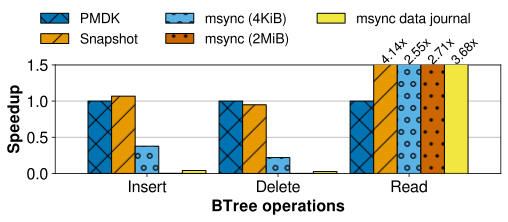

In [35]:
plt.rcParams["font.family"] = "freesans"
speedup = 1/df_norm
speedup = capitalize_index(speedup)
speedup = rename_cols(speedup, {'pmdk': u'PMDK', 'snapshot': u'Snapshot', 'msync': 'msync (4KiB)', 'msync huge pages': 'msync (2MiB)'})
ax = speedup.plot.bar(**Fig.get_kwargs(width=0.9))
f = Fig(ax)
ax.set_ylim((0, 1.5))

# f.fmt_label('YCSB benchmarks', 'Relative performance')
f.fmt_label('BTree operations', 'Speedup')
# ax.text(-1, 0.75, 'Higher is better', rotation=90, fontsize=fontsize,ha='center', va='center')
f.add_bar_labels([False]*3 + [False, False, True]*4, precision=2, fontsize=fontsize+2, over_fig=True, alpha=0,
                rotation=45, ha='left',label_off_frac=-0.02, label_x_off=-0.05)
f.xrot(rot=0)
f.fmt_grid(axis='y', which='both')
ax.set_yticks(np.arange(0, 1.51, 0.5))



bars = ax.patches
hatches = ''.join(h*len(df_norm) for h in 'X/o.')

for bar, hatch in zip(bars, hatches):
    if hatch == '.':
        hatch = '.'
    bar.set_hatch(hatch)

f.fmt_legend(ncol=3, y_off_scale=1.1, x_off_scale=0.9, fontsize=14, frameon=False)

save_fig('map.btree')

In [37]:
df_norm['msync']/df_norm['snapshot']

operation
insert    2.835117
delete    4.327726
read      1.622972
dtype: float64

In [38]:
df_norm['msync huge pages']/df_norm['snapshot']

operation
insert    463.761630
delete    673.402191
read        1.528608
dtype: float64

In [11]:
df_norm

,pmdk,snapshot,msync,msync huge pages,msync data journal
operation,,,,,
insert,1.0,0.936130,2.654038,434.141282,24.836191
delete,1.0,1.053686,4.560062,709.554181,38.600663
read,1.0,0.241674,0.392229,0.369424,0.272012


Plot saved as `plots/pathfinding/map.btree.mss.png`

Plot saved as `plots/pathfinding/map.btree.mss.png`

Using pdfcrop on `plots/pathfinding/map.btree.mss.png` with command `pdfcrop plots/pathfinding/map.btree.mss.pdf plots/pathfinding/map.btree.mss.pdf`

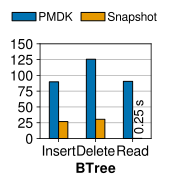

In [12]:
Fig.config(14, (2, 1.75))
plt.rcParams["font.family"] = "freesans"
df_mss_clean = rename_cols(df_mss, {'pmdk': u'PMDK', 'snapshot': u'Snapshot'})
df_mss_clean.index = [val.capitalize() for val in df_mss_clean.index]
ax = df_mss_clean.plot.bar(**Fig.get_kwargs(width=0.5))
f = Fig(ax)
# ax.set_ylim((0, 7))

# f.fmt_label('YCSB benchmarks', 'Relative performance')
f.fmt_label('BTree', '')
f.add_bar_labels([False]*3 + [False, False, True]*1, precision=2, fontsize=fontsize+2, over_fig=False, alpha=0,
                rotation=90, ha='center', va='bottom', suffix=' s', label_x_off=0.07)
f.xrot(rot=0)
f.fmt_grid(axis='y')
ax.set_yticks(np.arange(0, 150.1, 25))

f.fmt_legend(ncol=3, y_off_scale=1, x_off_scale=0.8, fontsize=12, frameon=False, columnspacing=0.7, handletextpad=0.2)

save_fig('map.btree.mss')